# Assignment #1

#### Practice the code you learned in Lab #1.
The markdown cell will tell you the question number and instruction on what to do.
Underneath will be an empty cell with a only #DO NOT RUN comment. 
This cell has been run already to give you example output. 
The code was deleted, so if you run it, you will lose the output.
Some of the code includes a ".head()" at the end, which prevents the output from being too long.

The answer cell will sometimes hold 'pseudo-code' to give you a hint of what's expected.
There will be a blank line, which is where you'll type your code. 
Write your own code in the ANSWER cell and run, then compare to the example output. 
There may be more than one way of generating the expected output.
Questions 1-3 have been completed for you, but you will need to run the ANSWER cells (and edit the path in #2).

1. Import pandas and give it the pd alias

In [1]:
#ANSWER
import pandas as pd

2. Create a variable that holds the path of your data

In [42]:
#ANSWER: 
path = 'C:/Users/btada/Dropbox/Wake Tech/BAS 250/'

3. Import the fortune500.csv file

In [43]:
#ANSWER: 
data1 = pd.read_csv(path+'fortune500.csv')

4. Look at the first 5 rows of data

In [44]:
#ANSWER: <data1.head() or data1[0:5]>
data1.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


5. Look at the variable types

In [5]:
data1.dtypes

Year                       int64
Rank                       int64
Company                   object
Revenue (in millions)    float64
Profit (in millions)      object
dtype: object

6. Change the column names of the last 2 columns to Revenue and Profit (respectively)

In [45]:
#ANSWER:
data1.rename(columns={'Revenue (in millions)':'Revenue', 'Profit (in millions)': 'Profit'}, inplace=True)

In [46]:
#ANSWER 

data1.columns

Index(['Year', 'Rank', 'Company', 'Revenue', 'Profit'], dtype='object')

7. Why is the Profit type not float64 like Revenue? Perhaps there are non-numeric values. Count the occurrences of each value (only return the top 5)

In [47]:
#ANSWER
data1['Profit'].value_counts().nlargest(5)

N.A.    369
4        73
3        71
6        67
5.7      67
Name: Profit, dtype: int64

8. Yes, the string value 'N.A.' has prevented the variable from automatically being numeric. Change the variable type of Profit to numeric

In [48]:
#ANSWER <data1.Profit = ; use the to_numeric() function; change the errors parameter>
data1.Profit = pd.to_numeric(data1.Profit, errors = 'coerce')

9. Validate that the variable types are now correct.

In [49]:
#ANSWER
data1.dtypes

Year         int64
Rank         int64
Company     object
Revenue    float64
Profit     float64
dtype: object

10. What is the first and last year in the dataset?

In [11]:
#ANSWER
data1.Year.describe()

#First year is 1955, Last year is 2005

count    25500.00000
mean      1980.00000
std         14.71989
min       1955.00000
25%       1967.00000
50%       1980.00000
75%       1993.00000
max       2005.00000
Name: Year, dtype: float64

11. Which Company was in the Fortune 500 for the most years?

In [12]:
#ANSWER
data1.Company.value_counts().nlargest(5)

#CBS has been in the fortune 500 for the most years

CBS                57
OfficeMax          55
Lockheed Martin    51
Unocal             51
Dana               51
Name: Company, dtype: int64

12. Create a new DataFrame for CBS only

In [114]:
#ANSWER <data1_CBS = >
data1_CBS = data1[data1.Company == 'CBS'].copy()

data1_CBS.head()

,Year,Rank,Company,Revenue,Profit
12,1955,13,CBS,1631.0,84.6
516,1956,17,CBS,1441.0,42.8
1016,1957,17,CBS,1525.4,3.5
1513,1958,14,CBS,2009.0,72.7
2012,1959,13,CBS,1895.7,74.8


13. What were the most profitable years for CBS? Sort by Profit descending

In [51]:
#ANSWER
data1_CBS.sort_values(by='Profit', ascending=False, inplace=True)
data1_CBS.head()

,Year,Rank,Company,Revenue,Profit
17527,1990,28,CBS,12844.0,922.0
17026,1989,27,CBS,12500.0,823.0
22736,2000,237,CBS,7510.0,780.0
16532,1988,33,CBS,10679.0,739.0
16027,1987,28,CBS,10731.0,670.8


14. Notice that CBS had 4 of its most profitable years from 1987 to 1990. Create a histogram for CBS Profit

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001621BEC2288>]],
      dtype=object)

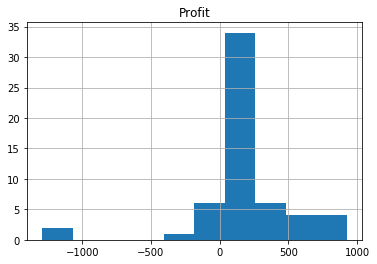

In [52]:
#ANSWER
data1_CBS.hist(column = 'Profit')

15. Which years did CBS have a negative profit?

In [53]:
#ANSWER
data1_CBS.sort_values(by='Profit', ascending=True, inplace=True)
data1_CBS.head(10)

,Year,Rank,Company,Revenue,Profit
19034,1993,35,CBS,12100.0,-1291.0
18530,1992,31,CBS,12794.0,-1086.0
19541,1994,42,CBS,11564.0,-326.0
12536,1980,37,CBS,7332.0,-73.9
22171,1999,172,CBS,9061.0,-21.0
1016,1957,17,CBS,1525.4,3.5
20634,1996,135,CBS,9605.0,15.0
10018,1975,19,CBS,6466.1,28.1
21155,1997,156,CBS,9401.0,30.0
516,1956,17,CBS,1441.0,42.8


16. It's interesting that Profit was negative for 3 years (1992-1994) almost immediately after its most profitable years. Create a new DataFrame for only the 1980s and 1990s.

In [18]:
#ANSWER <data1_CBS_80s90s = >
data1_CBS_80s90s = data1_CBS[data1_CBS.Year.between(1980, 1999, inclusive=True)].copy()

data1_CBS_80s90s

,Year,Rank,Company,Revenue,Profit
19034,1993,35,CBS,12100.0,-1291.0
18530,1992,31,CBS,12794.0,-1086.0
19541,1994,42,CBS,11564.0,-326.0
12536,1980,37,CBS,7332.0,-73.9
22171,1999,172,CBS,9061.0,-21.0
20634,1996,135,CBS,9605.0,15.0
21155,1997,156,CBS,9401.0,30.0
20120,1995,121,CBS,9208.0,77.0
13093,1981,94,CBS,3962.9,193.0
12593,1980,94,CBS,3670.4,200.7


17. Notice in the output above that there are 2 rows for 1980 and 1981. It seems that this is a data quality issue - let's inspect this issue further. Use the data1_CBS DataFrame to find how many years have multiple records.

In [19]:
#ANSWER (the example output was truncated using [0:11] at the end of the code)
data1_CBS.Year.value_counts()[0:11]

1974    2
1981    2
1980    2
1979    2
1978    2
1977    2
1976    2
1975    2
1973    2
1972    2
1995    2
Name: Year, dtype: int64

18. It seems that outside of 1995, the 'other CBS' only was only present in the Fortune 500 from 1972 - 1981. Let's examine the entire data1_CBS DataFrame to see if we can find any patterns.

In [101]:
#ANSWER
data1_CBS.sort_values(by = 'Year', ascending=True)

,Year,Rank,Company,Revenue,Profit
12,1955,13,CBS,1631.0,84.6
516,1956,17,CBS,1441.0,42.8
1016,1957,17,CBS,1525.4,3.5
1513,1958,14,CBS,2009.0,72.7
2012,1959,13,CBS,1895.7,74.8
2514,1960,15,CBS,1910.7,85.9
3015,1961,16,CBS,1955.7,79.1
3516,1962,17,CBS,1913.8,45.4
4016,1963,17,CBS,1954.5,57.1
4515,1964,16,CBS,2127.3,47.8


19. We can see that the 'other CBS' has an easy way to distinguish it from the 'real CBS' - rank of 87 or lower before 1995, rank of 237 or lower in 1995 or later. Use these conditions to remove the rows from the DataFrame. Don't forget to add .copy() to the end of your code to prevent warnings in step #20.

In [119]:
#ANSWER <data1_CBS2 = ; you will use at least 3 conditions; each should be in (); you will use & (AND) and | (OR);
data1_CBS3 = data1_CBS[(data1_CBS.Rank >= 87) & (data1_CBS.Year < 1995) | (data1_CBS.Rank > 237) & (data1_CBS.Year == 1995)].index
data1_CBS2 = data1_CBS.copy()
data1_CBS2.drop(data1_CBS3, inplace=True)
data1_CBS2

,Year,Rank,Company,Revenue,Profit
12,1955,13,CBS,1631.0,84.6
516,1956,17,CBS,1441.0,42.8
1016,1957,17,CBS,1525.4,3.5
1513,1958,14,CBS,2009.0,72.7
2012,1959,13,CBS,1895.7,74.8
2514,1960,15,CBS,1910.7,85.9
3015,1961,16,CBS,1955.7,79.1
3516,1962,17,CBS,1913.8,45.4
4016,1963,17,CBS,1954.5,57.1
4515,1964,16,CBS,2127.3,47.8


20. In the new DataFrame, drop the Company variable, since it is always CBS.

In [120]:
#ANSWER
data1_CBS2 = data1_CBS2.drop(columns = 'Company')
data1_CBS2.head()

,Year,Rank,Revenue,Profit
12,1955,13,1631.0,84.6
516,1956,17,1441.0,42.8
1016,1957,17,1525.4,3.5
1513,1958,14,2009.0,72.7
2012,1959,13,1895.7,74.8


21. Create a markdown cell with the header "Self Assessment" and standard text describing any difficulties you had with the assignment.

## Self Assessment

I didn't really have any issues with this assignment other than the last condition, which was to filter out by rank and year.  I found a way to do this using an index of the dataset I wanted to exclude.  I have posted the resource for this below.  I did not see an easy way to reverse the logic I used here to get the data I wanted to exclude.  The less than 1995 filter, would have excluded everything after 1995.  Again there being no validation rules (like number of expected rows etc) I couldnt truely validate my results.  

site used for deleting rows using multiple conditions:
https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/